# Homework 4 - Part1 - Predictive Analytics - Trung Le 

**Question 1.a**

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


2023-12-01 00:29:38.730581: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.11.0


In [3]:
import numpy as np
from math import pi

# Sample size
n_samples = 120000

# Sampling X from uniform distribution [-2*pi, 2*pi]
X = np.random.uniform(-2 * pi, 2 * pi, n_samples)

# Assuming an equation for Y, e.g., Y = sin(X)
# Replace this with the specific equation you have
Y = 2 * ((2 * np.cos(X)**2 - 1)**2) - 1

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Function to create a neural network model
def create_model(n_hidden_layers=1):
    model = Sequential()
    model.add(Dense(10, input_shape=(1,), activation='relu'))  # Input layer
    for _ in range(n_hidden_layers):
        model.add(Dense(10, activation='relu'))  # Hidden layers
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Train neural networks with 1, 2, and 3 hidden layers
models = {}
for i in [1, 2, 3]:
    model = create_model(n_hidden_layers=i)
    model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)
    models[f'NN_{i}_hidden_layers'] = model


2023-11-25 12:41:32.793019: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1875/1875 [==============================] - 1s 373us/step - loss: 0.1894
Epoch 2/10
1875/1875 [==============================] - 1s 359us/step - loss: 0.1339
Epoch 3/10
1875/1875 [==============================] - 1s 359us/step - loss: 0.1253
Epoch 4/10
1875/1875 [==============================] - 1s 359us/step - loss: 0.1052
Epoch 5/10
1875/1875 [==============================] - 1s 358us/step - loss: 0.0666
Epoch 6/10
1875/1875 [==============================] - 1s 390us/step - loss: 0.0225
Epoch 7/10
1875/1875 [==============================] - 1s 384us/step - loss: 0.0050
Epoch 8/10
1875/1875 [==============================] - 1s 368us/step - loss: 0.0015
Epoch 9/10
1875/1875 [==============================] - 1s 366us/step - loss: 8.0306e-04
Epoch 10/10
1875/1875 [==============================] - 1s 359us/step - loss: 6.8738e-04
Epoch 1/10
1875/1875 [==============================] - 1s 390us/step - loss: 0.0868
Epoch 2/10
1875/1875 [==============================] - 

### Set up the same hyperparameter as the parameter for each layer in the NN  in the paper
    '1_layer': [24, 48, 72, 128, 256],
    '2_layers': [12, 24, 36],
    '3_layers': [8, 16, 24]

### also use learning_rate=0.0001, momentum=0.9 like in the paper

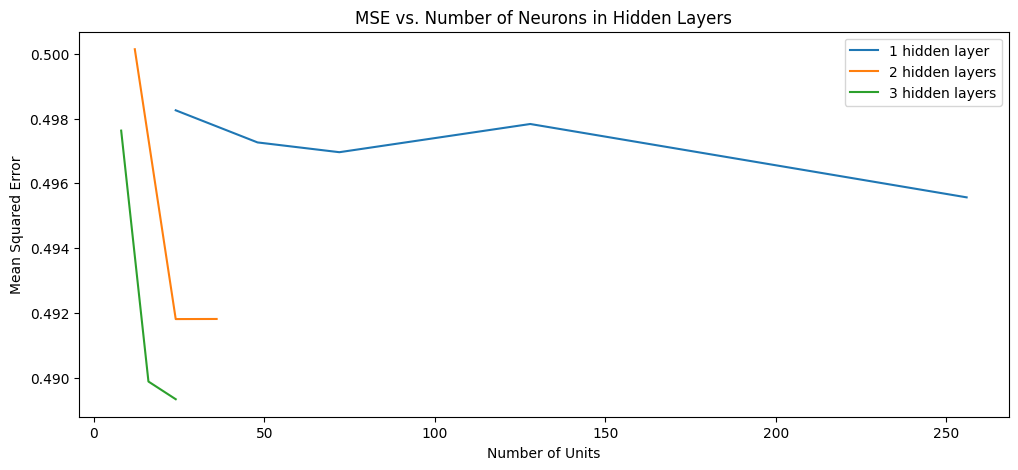

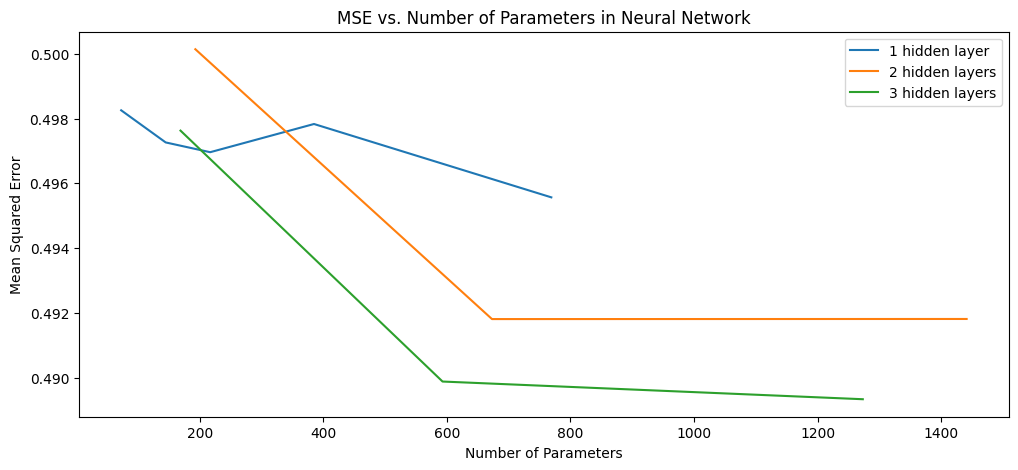

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from math import pi

# Generate simulated data
n_samples = 120000
X = np.random.uniform(-2 * pi, 2 * pi, n_samples)
Y = 2 * ((2 * np.cos(X)**2 - 1)**2) - 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Function to create a neural network model
def create_model(layers, units):
    model = Sequential()
    model.add(Dense(units, input_shape=(1,), activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='mean_squared_error')
    return model

# Define configurations
configs = {
    '1_layer': [24, 48, 72, 128, 256],
    '2_layers': [12, 24, 36],
    '3_layers': [8, 16, 24]
}

# Store MSE and number of parameters for each configuration
performance = {}

# Train and evaluate models for each configuration
for name, units_list in configs.items():
    mse_list = []
    param_list = []
    for units in units_list:
        layers = int(name.split('_')[0])
        model = create_model(layers, units)
        model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=0)
        mse = model.evaluate(X_test, Y_test, verbose=0)
        mse_list.append(mse)
        params = model.count_params()  # Count the total number of parameters
        param_list.append(params)
    performance[name] = {'mse': mse_list, 'params': param_list}

# Plot Number of Units vs MSE
plt.figure(figsize=(12, 5))
for name, data in performance.items():
    layers = int(name.split('_')[0])
    plt.plot(configs[name], data['mse'], label=f'{layers} hidden layer{"s" if layers > 1 else ""}')
plt.xlabel('Number of Units')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Neurons in Hidden Layers')
plt.legend()
plt.show()

# Plot Number of Parameters vs MSE
plt.figure(figsize=(12, 5))
for name, data in performance.items():
    layers = int(name.split('_')[0])
    plt.plot(data['params'], data['mse'], label=f'{layers} hidden layer{"s" if layers > 1 else ""}')
plt.xlabel('Number of Parameters')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Parameters in Neural Network')
plt.legend()
plt.show()


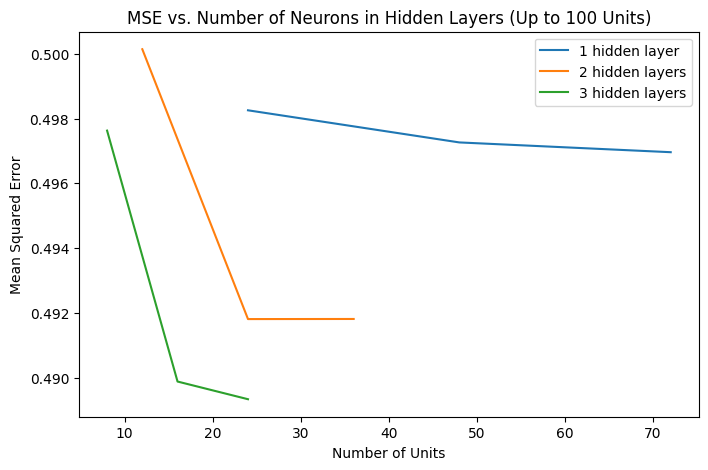

In [18]:
####Correct code

plt.figure(figsize=(8, 5))
for name, data in performance.items():
    layers = int(name.split('_')[0])
    # Filter the units and corresponding MSE values for those <= 100
    units = np.array(configs[name])
    mse = np.array(data['mse'])
    # Get the indices where the units are 100 or less
    valid_indices = np.where(units <= 100)
    # Select only the units and mse values where units are 100 or less
    valid_units = units[valid_indices]
    valid_mse = mse[valid_indices]
    plt.plot(valid_units, valid_mse, label=f'{layers} hidden layer{"s" if layers > 1 else ""}')
plt.xlabel('Number of Units')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Neurons in Hidden Layers (Up to 100 Units)')
plt.legend()
plt.show()

### We can alwaays see the deep NN always performance better than the shallow one although we have the same total number of neuron and other parameter

## We also want to try with different set up and training dataset 

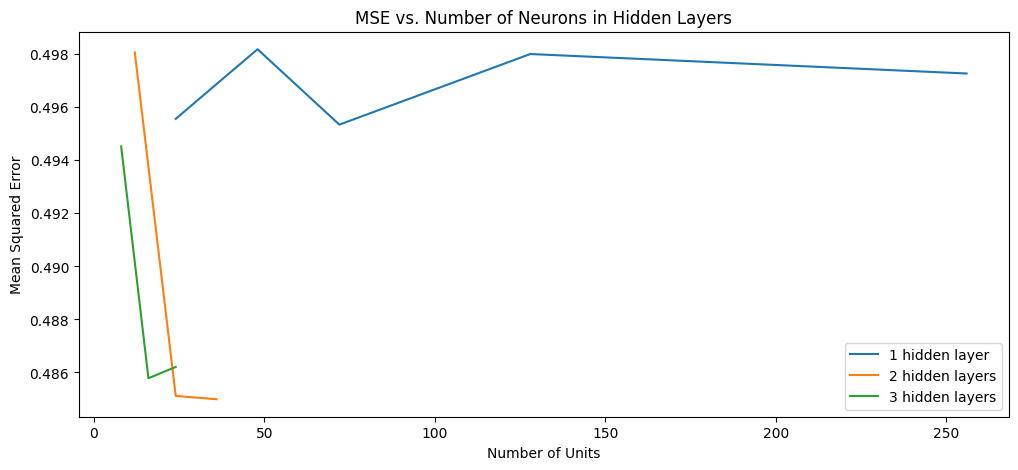

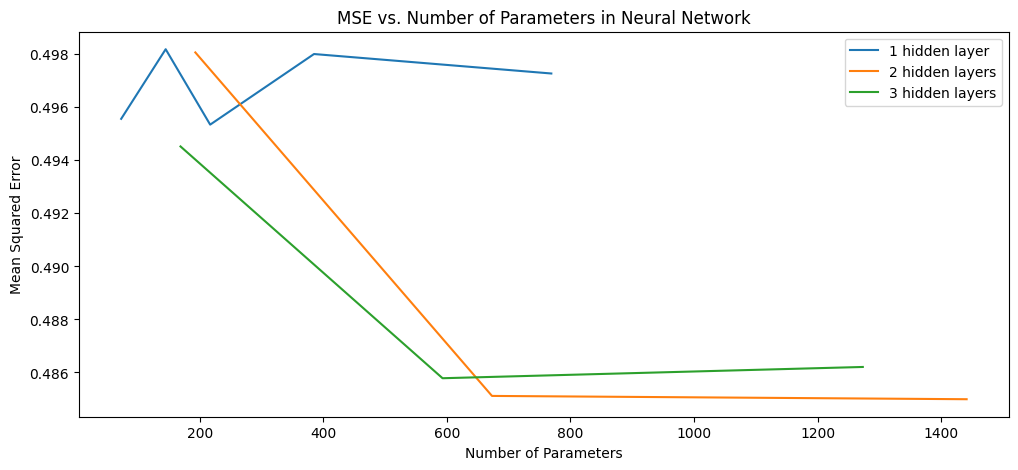

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from math import pi

# Generate simulated data
n_samples = 120000
X = np.random.uniform(-2 * pi, 2 * pi, n_samples)
Y = 2 * ((2 * np.cos(X)**2 - 1)**2) - 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# Function to create a neural network model
def create_model(layers, units):
    model = Sequential()
    model.add(Dense(units, input_shape=(1,), activation='relu'))
    for _ in range(layers - 1):
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='mean_squared_error')
    return model

# Define configurations
configs = {
    '1_layer': [24, 48, 72, 128, 256],
    '2_layers': [12, 24, 36],
    '3_layers': [8, 16, 24]
}

# Store MSE and number of parameters for each configuration
performance = {}

# Train and evaluate models for each configuration
for name, units_list in configs.items():
    mse_list = []
    param_list = []
    for units in units_list:
        layers = int(name.split('_')[0])
        model = create_model(layers, units)
        model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=0)
        mse = model.evaluate(X_test, Y_test, verbose=0)
        mse_list.append(mse)
        params = model.count_params()  # Count the total number of parameters
        param_list.append(params)
    performance[name] = {'mse': mse_list, 'params': param_list}

# Plot Number of Units vs MSE
plt.figure(figsize=(12, 5))
for name, data in performance.items():
    layers = int(name.split('_')[0])
    plt.plot(configs[name], data['mse'], label=f'{layers} hidden layer{"s" if layers > 1 else ""}')
plt.xlabel('Number of Units')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Neurons in Hidden Layers')
plt.legend()
plt.show()

# Plot Number of Parameters vs MSE
plt.figure(figsize=(12, 5))
for name, data in performance.items():
    layers = int(name.split('_')[0])
    plt.plot(data['params'], data['mse'], label=f'{layers} hidden layer{"s" if layers > 1 else ""}')
plt.xlabel('Number of Parameters')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Parameters in Neural Network')
plt.legend()
plt.show()
